# Thompson Sampling

<img src='Thompson_Sampling_Slide.png'/>

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing Thompson Sampling

In [13]:
import random
N = 10000
d = 10
numbers_of_rewards_1 = [0]*d
numbers_of_rewards_0 = [0]*d
ads_selected = []
total_rewards = 0
for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    if reward == 0:
        numbers_of_rewards_0[ad] += 1
    total_rewards += reward

total_rewards

2599

## Visualising the results - Histogram

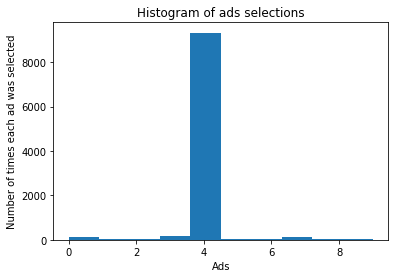

In [14]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()